# FASHION MNIST
- **fashion mnist dataset**:  a dataset of Zalando's article images - consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando extends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking for machine learning algorithms. It shares the same image size and struct of training and testing splits.
-  **Goal**: classify grayscale Fashion-MNIST image into 10 classes

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

# LOAD DATA

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
type(X_train)
type(y_train)

numpy.ndarray

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
np.info(X_train)

class:  ndarray
shape:  (60000, 28, 28)
strides:  (784, 28, 1)
itemsize:  1
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x24e28358070
byteorder:  little
byteswap:  False
type: uint8


In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]
class_names[y_train[1]]

class_nums = len(class_names)


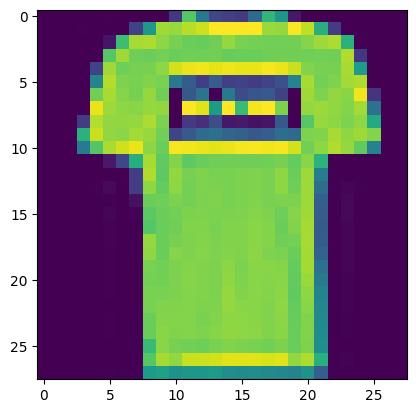

In [7]:
plt.imshow(X_train[1])

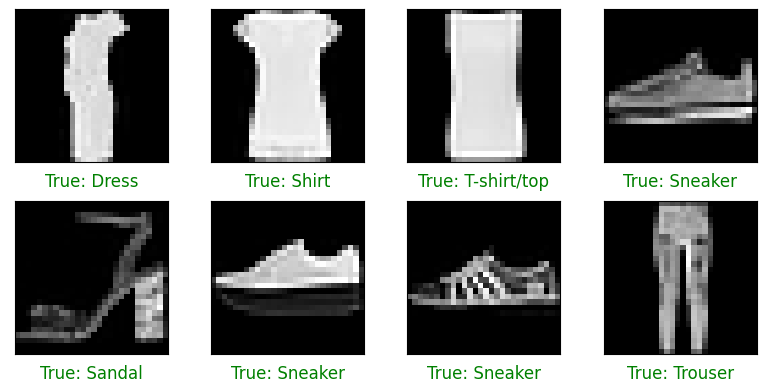

In [62]:
from typing import Optional
def plot_data(x_data: np.ndarray, y_data: np.ndarray, y_predict: Optional[np.ndarray] = None) -> None:
    nrows, ncols = 2, 4
    fig, axes = plt.subplots(nrows, ncols, figsize = (8, 4))

    len_x = x_data.shape[0]
    for idx in range(nrows * ncols):
        ax = axes[idx // ncols, idx % ncols]

        img_idx = random.randint(0, len_x)

        ax.imshow(x_data[img_idx], cmap="gray")
        ax.set(xticks=[], yticks=[])
        color = "Green"
        label_string = f"True: {class_names[y_data[img_idx]]}"

        if y_predict is not None:
            predict_idx = np.argmax(y_predict[img_idx])
            predict_label = class_names[predict_idx]
            color = "red" if predict_idx != y_data[img_idx] else color
            predict_string = f"\nPredicted: {predict_label}"

        img_title = label_string if y_predict is None else label_string + predict_string
        ax.set_xlabel(img_title, color="green", fontsize=12)
    
    plt.tight_layout()
    plt.show()


plot_data(X_train, y_train)

# Image pre-processing
- `Data Normalization`: Reshaping it into the shape model expects and rescaling it so that all values are in the `[0,1]` interval
- `Input Data Type Conversion`: Transform it from `unit8` to `float32`


# Artificial Neural Network (ANN) - [Wikipedia](https://en.wikipedia.org/wiki/Artificial_neural_network)


In [9]:
# Convert to floastr 32 Scale images from [0, 255] ot [0, 1] range for training
X_train = X_train.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

In [10]:
X_train.shape, X_train.dtype
X_test.shape, X_test.dtype

((10000, 28, 28), dtype('float32'))

In [11]:
# Make sure images have shape (6000, 28, 28) => (6000, 28, 28, 1) by np.expand_dims
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)


In [12]:
# convert class vectors to binary class matrics: index = 1 ==> [0 1 0 0 0 0 ...]
y_train_label =  keras.utils.to_categorical(y_train, class_nums)
y_test_label =  keras.utils.to_categorical(y_test, class_nums)

In [13]:
y_train[0], y_test_label[0]

(9, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32))

# Network (ANN) Architechture

In [14]:
input_shape = (28, 28, 1)

# Flatten convert 2D image to 1D image with 784 elements 
# Dense

model = keras.models.Sequential([
    layers.Flatten(input_shape = input_shape), # (28, 28, 1) => (784)
    layers.Dense(512, activation = "relu"),
    layers.Dense(256, activation = "relu"),
    layers.Dense(class_nums, activation = "softmax") # output layers
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Use optimize called "rmsprop" for "Back Propagation"
model.compile(
    optimizer="rmsprop",
    loss = "categorical_crossentropy",
    metrics = "accuracy"
)

In [46]:
# epochs is the number of traing loops
epochs = 10
batch_size = 128
history = model.fit(X_train, y_train_label, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 6s 14ms/step - loss: 0.1377 - accuracy: 0.9487 - val_loss: 0.5121 - val_accuracy: 0.8882
Epoch 2/10
422/422 [==============================] - 6s 14ms/step - loss: 0.1366 - accuracy: 0.9496 - val_loss: 0.5479 - val_accuracy: 0.8905
Epoch 3/10
422/422 [==============================] - 5s 13ms/step - loss: 0.1333 - accuracy: 0.9501 - val_loss: 0.5090 - val_accuracy: 0.8918
Epoch 4/10
422/422 [==============================] - 7s 16ms/step - loss: 0.1302 - accuracy: 0.9508 - val_loss: 0.5174 - val_accuracy: 0.8888
Epoch 5/10
422/422 [==============================] - 8s 18ms/step - loss: 0.1309 - accuracy: 0.9515 - val_loss: 0.5685 - val_accuracy: 0.8910
Epoch 6/10
422/422 [==============================] - 5s 12ms/step - loss: 0.1283 - accuracy: 0.9534 - val_loss: 0.5041 - val_accuracy: 0.8907
Epoch 7/10
422/422 [==============================] - 5s 12ms/step - loss: 0.1266 - accuracy: 0.9533 - val_loss: 0.5492 - val_accuracy: 0.8922

In [49]:
history_dict = history.history

history_dict.keys()

train_acc, val_acc = history_dict["accuracy"], history_dict["val_accuracy"]
train_loss, val_loss = history_dict["loss"], history_dict["val_loss"]

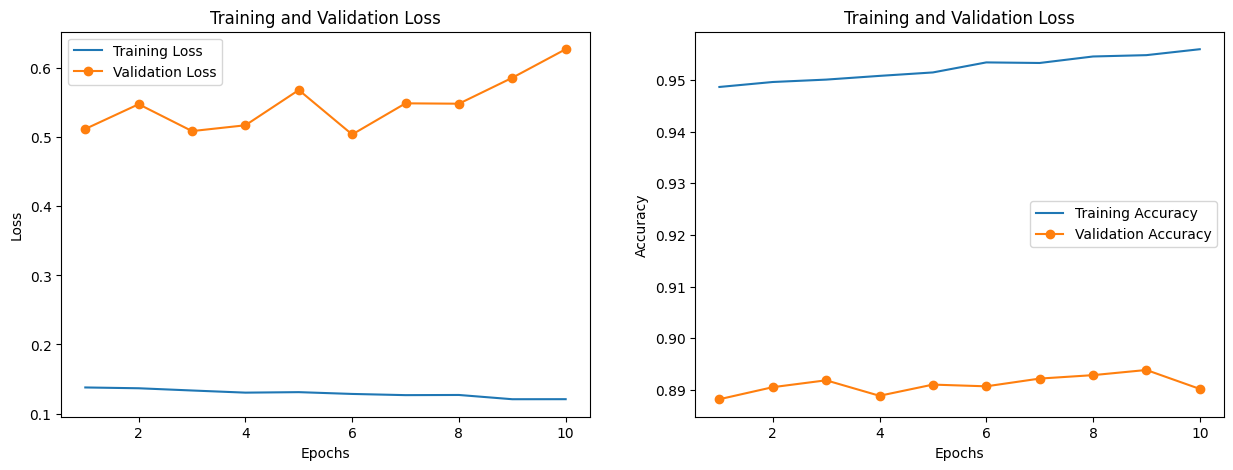

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
epoch_runs = [i+1 for i in range(epochs)]

ax1.plot(epoch_runs, train_loss, label="Training Loss")
ax1.plot(epoch_runs, val_loss, label="Validation Loss", marker="o")
ax1.set(title="Training and Validation Loss", xlabel="Epochs", ylabel="Loss")
ax1.legend()

ax2.plot(epoch_runs, train_acc, label="Training Accuracy")
ax2.plot(epoch_runs, val_acc, label="Validation Accuracy", marker="o")
ax2.set(title="Training and Validation Loss", xlabel="Epochs", ylabel="Accuracy")
ax2.legend()


plt.show()

# 4. MODEL EVALUATION

In [51]:
score = model.evaluate(X_test, y_test_label)

313/313 [==============================] - 1s 4ms/step - loss: 0.6803 - accuracy: 0.8849


In [52]:
print(f"Test Loss: {score[0]}")
print(f"Test Accuracy: {score[1]}")

Test Loss: 0.6802816390991211
Test Accuracy: 0.8848999738693237


# 5. PREDICTION 

In [54]:
X_sample = X_test[:3]
y_predict = model.predict(X_sample)

1/1 [==============================] - 0s 31ms/step


In [55]:
y_predict.round(3)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [58]:
prediction = np.argmax(y_predict, axis=1)
[class_names[pre] for pre in prediction]

['Ankle boot', 'Pullover', 'Trouser']

313/313 [==============================] - 1s 3ms/step


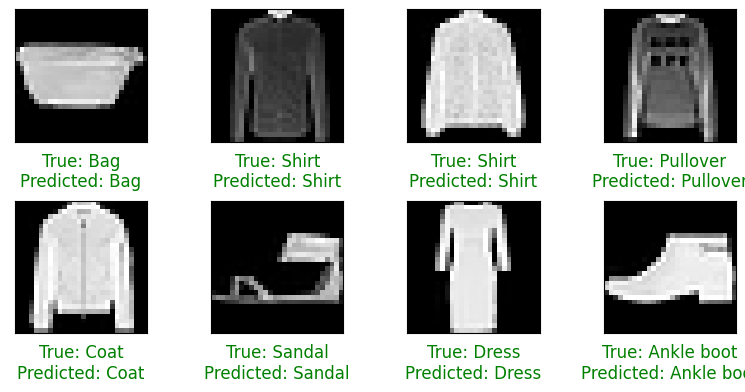

In [65]:
y_predict = model.predict(X_test)
plot_data(X_test, y_test, y_predict)